<a href="https://colab.research.google.com/github/ryannemilligan/Linear-Regression---Can-Advertising-Predict-Sales-/blob/main/K_Means_Visualization_Ryanne_Milligan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering Assignement

* Please scroll to the bottom of the notebook to find the assignement


# **Iris dataset**
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3] Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

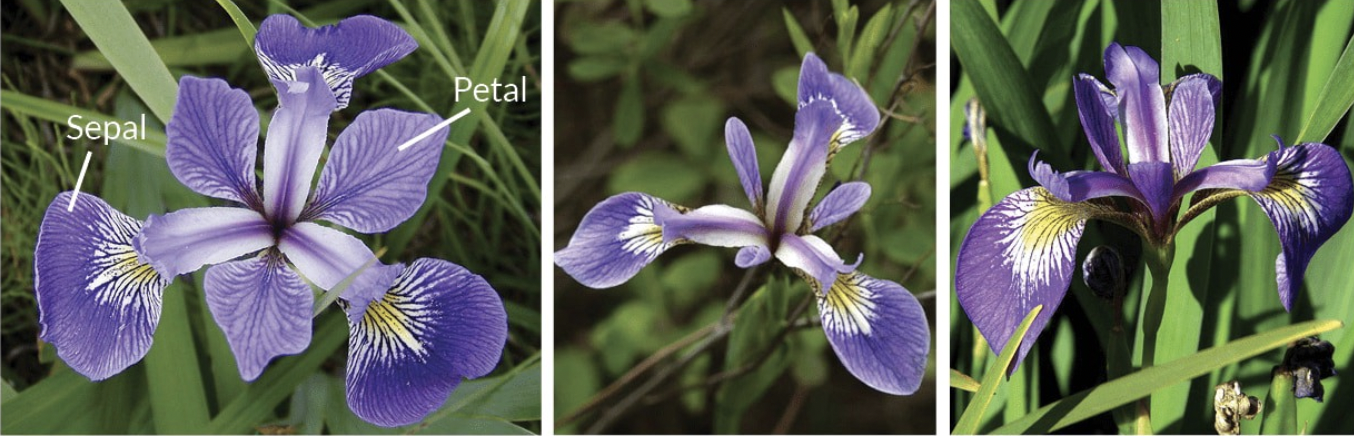

This study we try to clustering Iris Dataset used Kmeans

[Attribute Information](https://archive.ics.uci.edu/ml/datasets/iris):

1.sepal length in cm

2.sepal width in cm

3.petal length in cm

4.petal width in cm

class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica





In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [5]:
#importing and reading datasets
iris = pd.read_csv("IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [6]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome


col_0,count
species,
setosa,50
versicolor,50
virginica,50


In [8]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

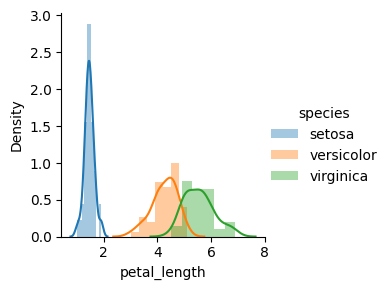

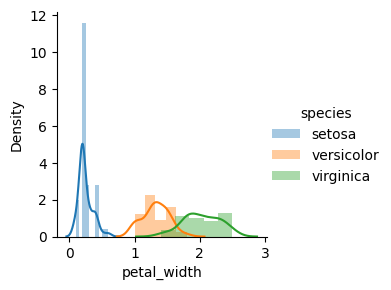

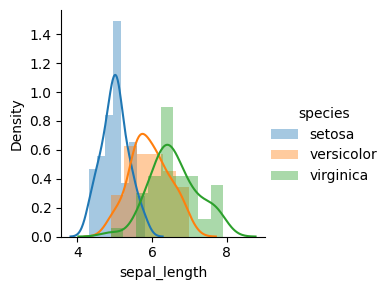

In [9]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

**How to Implementing K-Means Clustering ?**

1.Choose the number of clusters k

2.Select k random points from the data as centroids

3.Assign all the points to the closest cluster centroid

4.Recompute the centroids of newly formed clusters

5.Repeat steps 3 and 4

In [10]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## **Using the elbow method to determine the optimal number of clusters for k-means clustering**

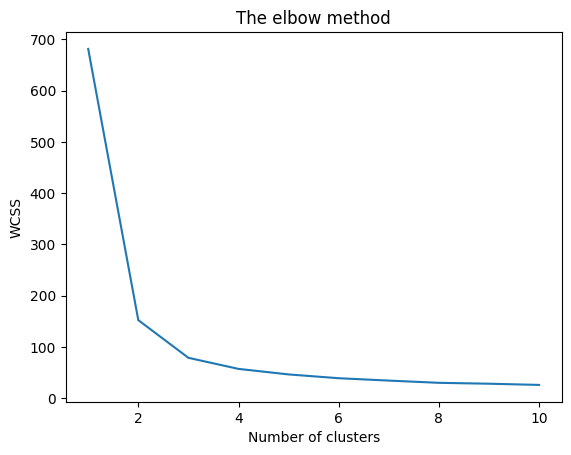

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## **Implementing K-Means Clustering**
**

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

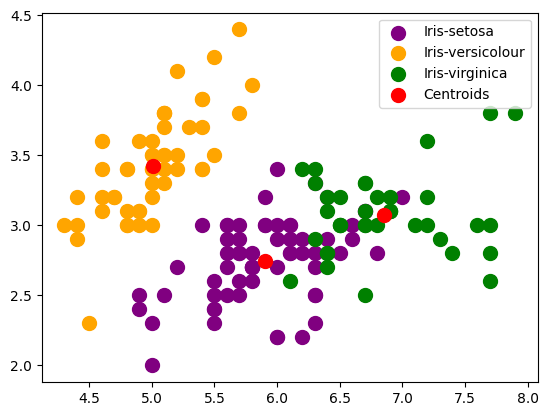

In [13]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

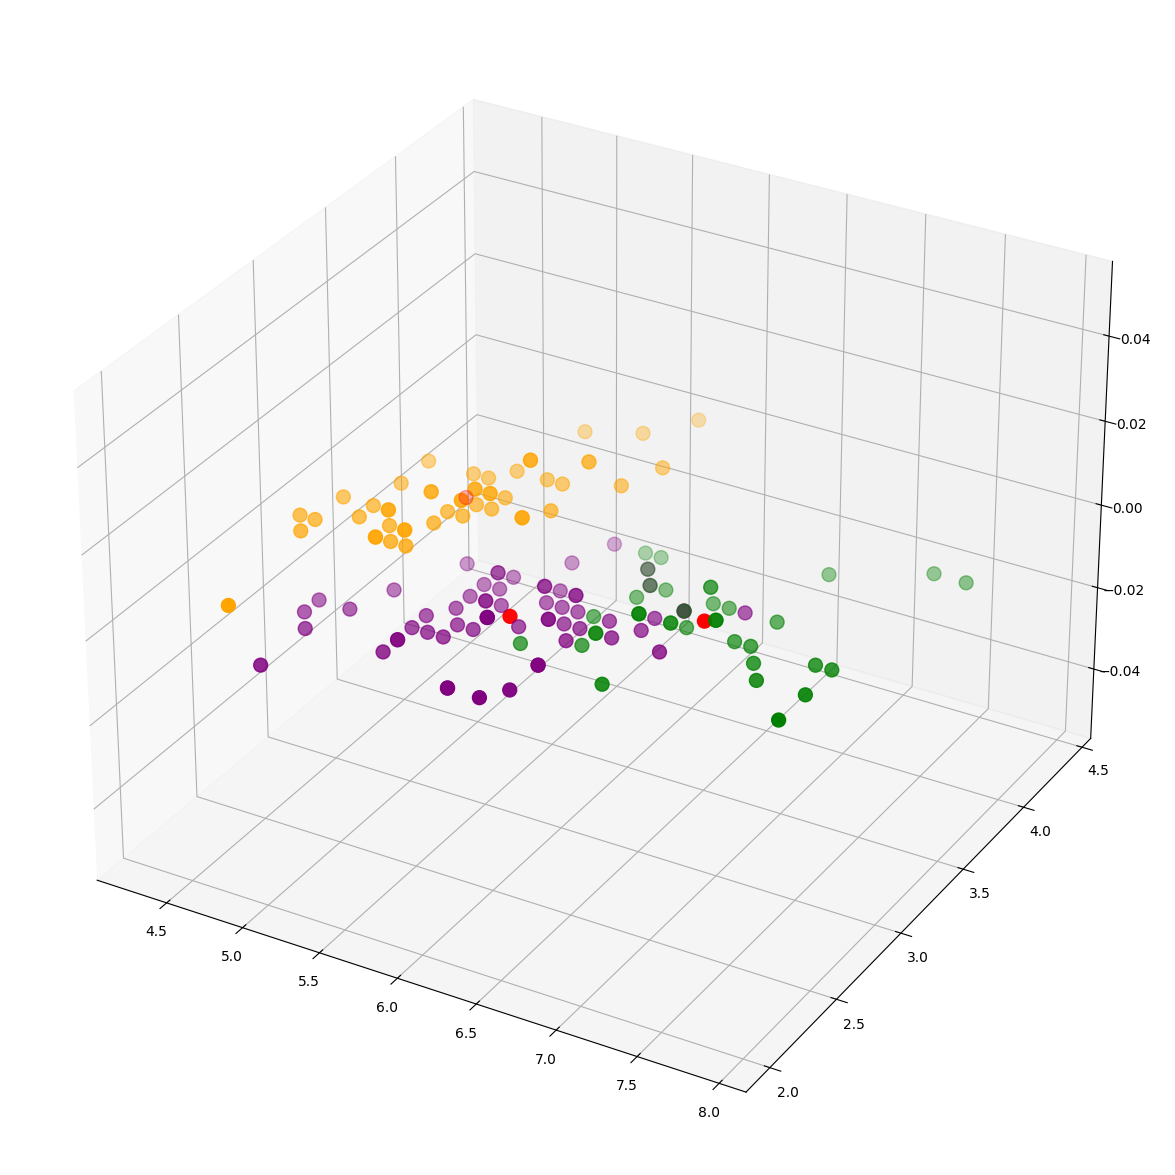

In [14]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

# DBSCAN

Now we will be using DBSCAN algorithm with the Iris dataset again.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN



DBSCAN clustering is implemented as the DBSCAN transformation object available in the sklearn.cluster library. We define the clustering object dbscan, and we learn from the normalized data X_norm, and store the resulting cluster assignment information in the array y_clus. In addition, the indices for core points are available as the attribute core_sample_indices_ so we store that information in „code.

In [16]:
# Loading the iris data
iris = datasets.load_iris()
X = iris.data  # array for the features
y = iris.target  # array for the target
feature_names = iris.feature_names   # feature names
target_names = iris.target_names   # target names

# z-score normalization using fit_transform method
X_norm = StandardScaler().fit_transform(X)


In [17]:
dbscan = DBSCAN()  # defining the clustering object
dbscan.fit(X_norm)  # fitting the data
y_clus = dbscan.labels_   # cluster labels
indCore = dbscan.core_sample_indices_   # indices of core points

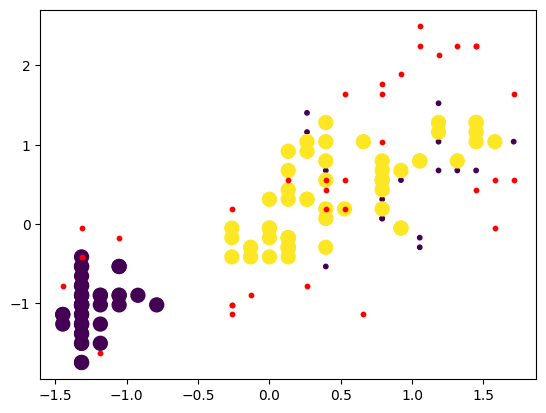

In [18]:
# plotting non-noise points
plt.scatter(X_norm[y_clus>0,3],X_norm[y_clus>0,0], c=y_clus[y_clus>0],
            marker='o', s=10)
# plotting core points
plt.scatter(X_norm[indCore,3], X_norm[indCore,0],c=y_clus[indCore],
            marker='o', s=100)
# plotting noise points
plt.scatter(X_norm[y_clus==-1,3],X_norm[y_clus==-1,0], c='r',
            marker='o', s=10)
plt.show()

we plot the normalized sepal length (x-axis) vs the normalized petal width (y-axis), with different clusters indicated by different colors. A cluster index of -1 corresponds to a noise points, whereas all the other indices are integers corresponding to different clusters. In the plot, core points are plotted with larger markers, and noise points are plotted in red.

# **Assignment**

### Experiment with the following number of clusters (n= 4,5,9)
### Plot the graphs for each case

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)


### N-cluster =4

In [20]:
#Your Code for n_cluster= 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

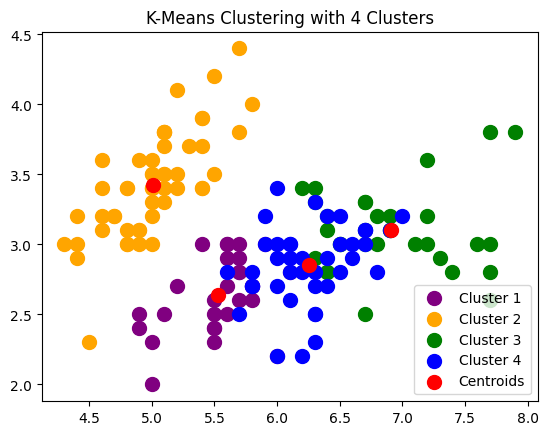

In [21]:
# your code for plotting the graph where number of clusters= 4
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.title("K-Means Clustering with 4 Clusters")
plt.show()


### N-cluster =5

In [22]:
#Your Code for n_cluster= 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

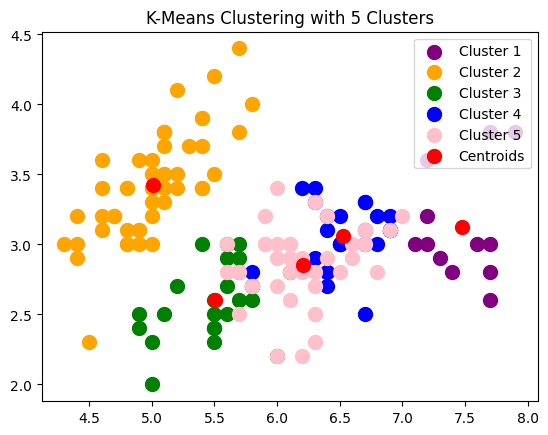

In [23]:
# Visualizing the clusters (for n_clusters = 5)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.title("K-Means Clustering with 5 Clusters")
plt.show()


### N-cluster= 9

In [24]:
#Your Code for n_cluster= 9
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

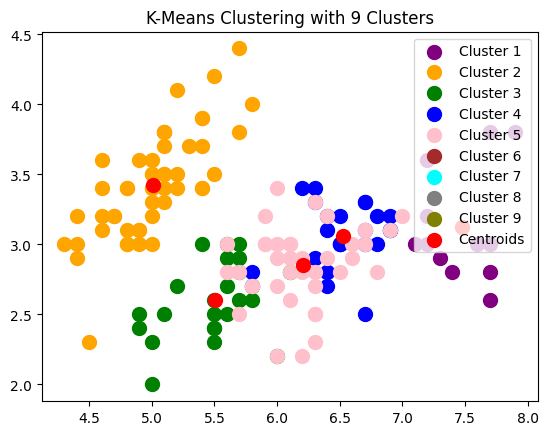

In [27]:
# Visualizing the clusters (for n_clusters = 9)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1], s = 100, c = 'cyan', label = 'Cluster 7')
plt.scatter(x[y_kmeans == 7, 0], x[y_kmeans == 7, 1], s = 100, c = 'gray', label = 'Cluster 8')
plt.scatter(x[y_kmeans == 8, 0], x[y_kmeans == 8, 1], s = 100, c = 'olive', label = 'Cluster 9')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.title("K-Means Clustering with 9 Clusters")
plt.show()

